# Using Normal Method and Creating Dummies Variable


In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv("csv_files/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [24]:
dummies = pd.get_dummies(df['Car Model'])
merged = pd.concat([df, dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [25]:
final = merged.drop(['Car Model'], axis=1)
final 

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [26]:
x_val = final.drop(['Sell Price($)', 'Audi A5'], axis=1)
y_val = final['Sell Price($)']

model = LinearRegression()
model.fit(x_val, y_val)
y_val
x_val

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [27]:
model.predict([[45000,4,0,1]])

array([36991.31721061])

In [28]:
model.score(x_val, y_val)

0.9417050937281082

## Using One Hot Encoding

#### Notice that we should drop ONE of the dummy variables as to avoid dummy variable trap that would lead to MULTICOLLINEARITY problem. ###


In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

dfle = df
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [30]:
X_val = dfle[['Car Model','Mileage','Age(yrs)']].values
Y_val = dfle[['Sell Price($)']]

In [31]:
ohe = OneHotEncoder(categorical_features=[0])
X_val = ohe.fit_transform(X_val).toarray()
X_val

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [32]:
X_val = X_val[:,1:]
print(X_val)
model.fit(X_val, Y_val)


[[1.00e+00 0.00e+00 6.90e+04 6.00e+00]
 [1.00e+00 0.00e+00 3.50e+04 3.00e+00]
 [1.00e+00 0.00e+00 5.70e+04 5.00e+00]
 [1.00e+00 0.00e+00 2.25e+04 2.00e+00]
 [1.00e+00 0.00e+00 4.60e+04 4.00e+00]
 [0.00e+00 0.00e+00 5.90e+04 5.00e+00]
 [0.00e+00 0.00e+00 5.20e+04 5.00e+00]
 [0.00e+00 0.00e+00 7.20e+04 6.00e+00]
 [0.00e+00 0.00e+00 9.10e+04 8.00e+00]
 [0.00e+00 1.00e+00 6.70e+04 6.00e+00]
 [0.00e+00 1.00e+00 8.30e+04 7.00e+00]
 [0.00e+00 1.00e+00 7.90e+04 7.00e+00]
 [0.00e+00 1.00e+00 5.90e+04 5.00e+00]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
model.predict([[0,1,45000,4]])

array([[36991.31721062]])

In [34]:
model.score(X_val, Y_val)

0.9417050937281083

## Trying things out with the Dataset


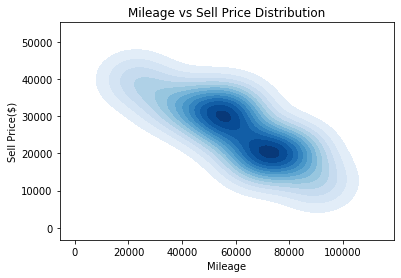

In [38]:
import seaborn as sns
from matplotlib import pyplot as plt


ax = sns.kdeplot(df["Mileage"], df["Sell Price($)"], n_levels=15, cmap="Blues", shade=True, shade_lowest=False)
ax.set_title("Mileage vs Sell Price Distribution")
plt.show()

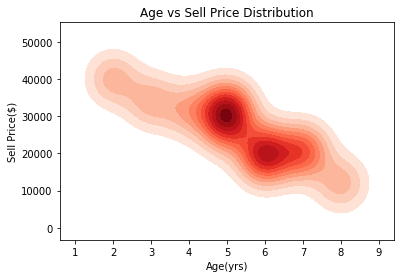

In [36]:
ax = sns.kdeplot(df["Age(yrs)"], df["Sell Price($)"], n_levels=15, cmap="Reds", shade=True, shade_lowest=False)
ax.set_title("Age vs Sell Price Distribution")
plt.show()

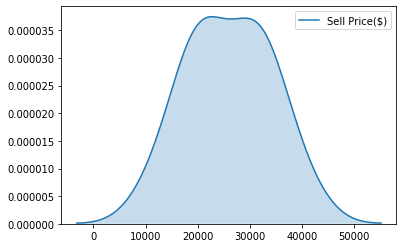

In [37]:
ax = sns.kdeplot(df["Sell Price($)"], shade=True)